In [7]:
import requests
import cv2 as cv
from matplotlib import pyplot as plt 
import numpy as np

from utils import *

# Scale Invariant Feature Transform (SIFT)

[Additional reading](https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html)

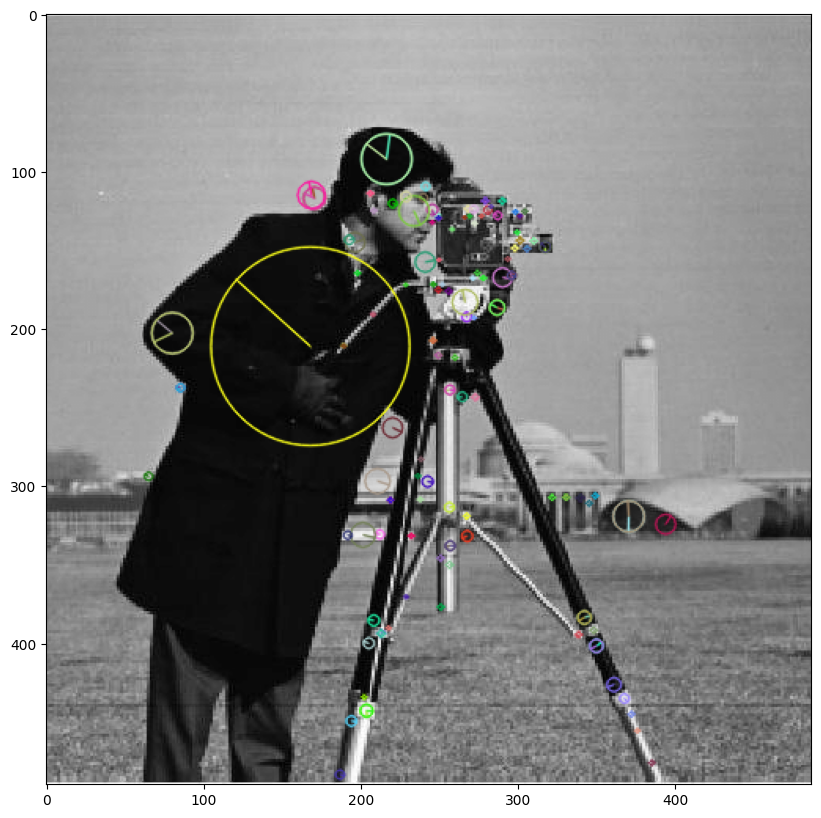

In [37]:
image = cv.imread('data/images/cameraman.png', cv.IMREAD_GRAYSCALE)

sift = cv.SIFT_create(nfeatures = 150)
kp = sift.detect(image, None)
des = sift.compute(image, kp)
#kp des = siftdetectAndCompute(image, None)

plt.figure(figsize = (10,10))
img = cv.drawKeypoints(image, kp, -1, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img)

# SIFT Feature Matching

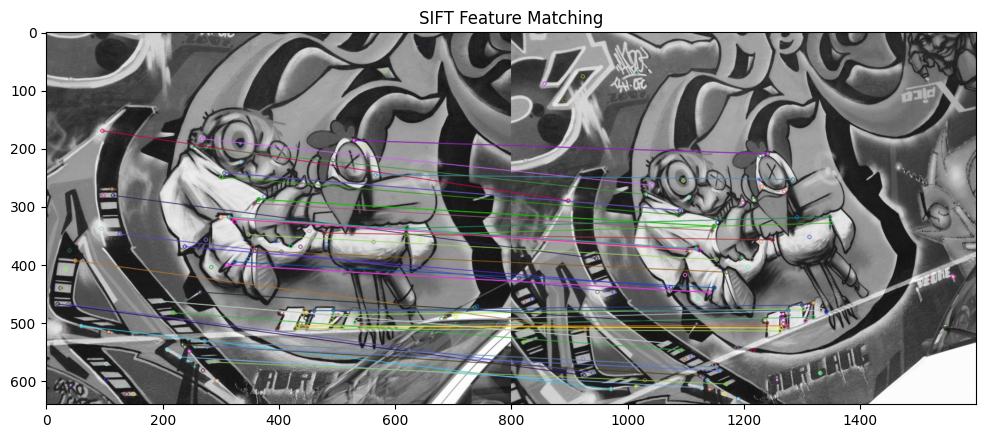

In [46]:
# Load images
image1 = cv.imread('data/images/cartoon1.pgm', cv.IMREAD_GRAYSCALE)
image2 = cv.imread('data/images/cartoon2.pgm', cv.IMREAD_GRAYSCALE)

# Initialize ORB detector
feat = cv.SIFT_create(nfeatures = 150)

# Find the keypoints and descriptors with ORB
keypoints1, descriptors1 = feat.detectAndCompute(image1, None)
keypoints2, descriptors2 = feat.detectAndCompute(image2, None)

# Create BFMatcher (Brute Force Matcher)
bf = cv.BFMatcher()

# Match descriptors
matches = bf.match(descriptors1, descriptors2)

# Sort them in ascending order of distance 
matches = sorted(matches, key=lambda x: x.distance)

# Draw matches
img_matches = cv.drawMatches(image1, keypoints1, image2, keypoints2, matches[:50], 
                              cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
                              

# Plot the matches using Matplotlib
plt.figure(figsize = (12,8))
plt.imshow(img_matches)
plt.title('SIFT Feature Matching')
plt.show()